## Variation, Comparison

Now, let's represent how these variables correlate with one another among the monthly dataset. For this, we'll use a binned analysis. First, let's load our data.

In [1]:
import xarray as xarr

filename = "./data/clipped_monthly_single_1988.nc"
data = xarr.open_dataset(filename)

Now, we can calculate the mean across each time point across all latitudes and longitudes.

In [2]:
# calculate nationwide average across the year
temp_timeseries = data["t2m"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time').values.flatten()
precipitation_timeseries = data["tp"].mean(dim=['latitude', 'longitude']).dropna(dim='valid_time').values.flatten()

Finally, we can plot it with a violin plot. To do so, we first need to calculate the temperature quartiles (which is easier to do in numpy).

In [3]:
import numpy as nump

# first need to create the temperature quartiles
temp_quartiles = nump.percentile(temp_timeseries, [0, 25, 50, 75, 100])

# group the precipitation values by quartile
cold = precipitation_timeseries[temp_timeseries <= temp_quartiles[1]]
cool = precipitation_timeseries[(temp_timeseries > temp_quartiles[1]) & (temp_timeseries <= temp_quartiles[2])]
warm = precipitation_timeseries[(temp_timeseries > temp_quartiles[2]) & (temp_timeseries <= temp_quartiles[3])]
hot = precipitation_timeseries[temp_timeseries > temp_quartiles[3]]

Finally, we can plot it.

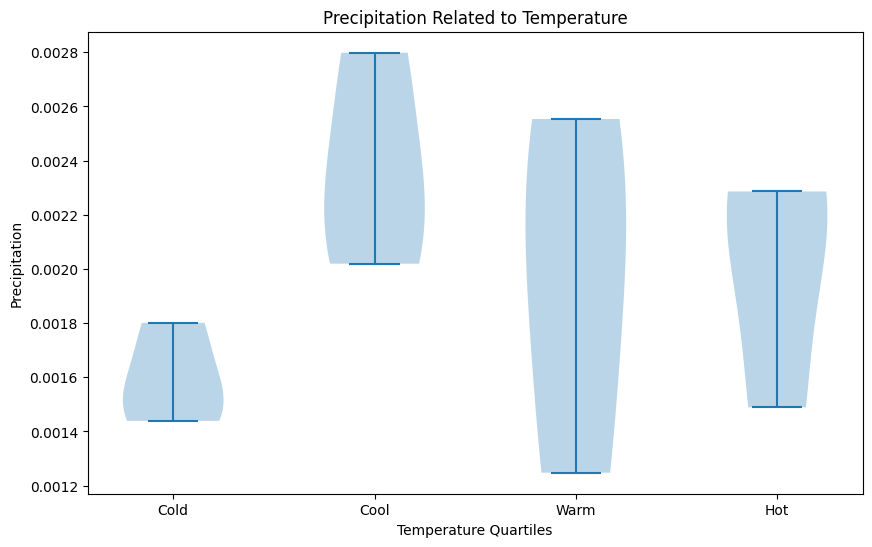

In [4]:
import matplotlib.pyplot as plot

# Plot
plot.figure(figsize=(10, 6))
plot.violinplot([cold, cool, warm, hot], positions=[1, 2, 3, 4])
plot.xticks([1, 2, 3, 4], ["Cold", "Cool", "Warm", "Hot"])
plot.ylabel("Precipitation")
plot.xlabel("Temperature Quartiles")
plot.title("Precipitation Related to Temperature")
plot.savefig("./plots/Violin_Tempearture_Precipitation_Chart.png")
plot.show()